In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.constraints import maxnorm
from tensorflow.keras.utils import to_categorical


2023-07-02 02:36:53.042632: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
dataset_dir = './_data'

train_ratio = 0.8  # 80% for training, 20% for testing
# Lists to store the file paths and labels
file_paths = []
label_ids = []
labels = ['A', 'B', 'C', 'D', 'E', 'Exceptions']

In [4]:
import tensorflow as tf

devices = tf.config.list_physical_devices("GPU")

if devices:
  print("TensorFlow is running with your GPU")
else:
  print("TensorFlow is not running with your GPU")

TensorFlow is not running with your GPU


## Checking if any image is corrupted or not

In [5]:
import os
# Iterate through each class directory
for label_id, label in enumerate(labels):
    class_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        file_paths.extend([os.path.join(class_dir, f) for f in image_files])
        label_ids.extend([label_id] * len(image_files))

# Shuffle the file paths and label IDs
tf.random.set_seed(42)
tf.random.shuffle(file_paths)
tf.random.set_seed(42)
tf.random.shuffle(label_ids)

# Split the dataset into training and testing sets using stratified sampling
X_train_paths, X_test_paths, y_train_ids, y_test_ids = train_test_split(file_paths, label_ids, train_size=train_ratio, stratify=label_ids)

# Convert the image data into NumPy arrays
X_train = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_train_paths])
X_test = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_test_paths])

# Normalizing and performing one-hot encoding
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

# Convert the label IDs into one-hot encoded vectors
y_train = to_categorical(y_train_ids, num_classes=len(labels))
y_test = to_categorical(y_test_ids, num_classes=len(labels))

num_classes = y_test.shape[1]
num_classes

2023-07-02 02:37:43.781858: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 02:37:43.782123: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


6

In [5]:
X_train.shape

(7688, 130, 20, 3)

In [6]:
'./_data/Exceptions/Question2-scan0047.jpg' in X_train_paths

True

In [7]:
import keras

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(130,20,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 20, 32)       896       
                                                                 
 dropout (Dropout)           (None, 130, 20, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 130, 20, 32)       9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 10, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 65, 10, 64)        0         
                                                        

In [9]:
model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 15))

In [10]:
hist = model.fit(X_train, y_train , epochs=15, validation_split=0.1, callbacks=[lr_scheduler])

Epoch 1/15


2023-06-23 14:54:36.090077: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-23 14:54:36.545871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


217/217 [==============================] - ETA: 0s - loss: 1.6690 - accuracy: 0.2542

2023-06-23 14:54:44.279626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


217/217 [==============================] - 9s 35ms/step - loss: 1.6690 - accuracy: 0.2542 - val_loss: 1.1040 - val_accuracy: 0.6840 - lr: 1.0000e-04
Epoch 2/15
217/217 [==============================] - 7s 32ms/step - loss: 0.5376 - accuracy: 0.8257 - val_loss: 0.4160 - val_accuracy: 0.8726 - lr: 1.1659e-04
Epoch 3/15
217/217 [==============================] - 7s 33ms/step - loss: 0.3217 - accuracy: 0.9023 - val_loss: 0.2695 - val_accuracy: 0.9116 - lr: 1.3594e-04
Epoch 4/15
217/217 [==============================] - 7s 32ms/step - loss: 0.2688 - accuracy: 0.9212 - val_loss: 0.2502 - val_accuracy: 0.9259 - lr: 1.5849e-04
Epoch 5/15
217/217 [==============================] - 7s 32ms/step - loss: 0.2149 - accuracy: 0.9380 - val_loss: 0.2050 - val_accuracy: 0.9441 - lr: 1.8478e-04
Epoch 6/15
217/217 [==============================] - 7s 31ms/step - loss: 0.2144 - accuracy: 0.9392 - val_loss: 0.2287 - val_accuracy: 0.9363 - lr: 2.1544e-04
Epoch 7/15
217/217 [==============================]

## Save Model

In [ ]:
# models_path = "./saved_models"

# os.makedirs(models_path, exist_ok=True)

# # get the number of files in the directory
# def get_num_files(path):
#     if not os.path.exists(path):
#         return 0
#     return sum([len(files) for r, d, files in os.walk(path)])

# # save the model with the current number
# num_files = get_num_files(models_path)

# model.save(os.path.join(models_path, f"model_{num_files}.h5"))

/var/folders/fp/mn15v0dx2s7_pkffb0939s800000gn/T/ipykernel_23492/3113396048.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


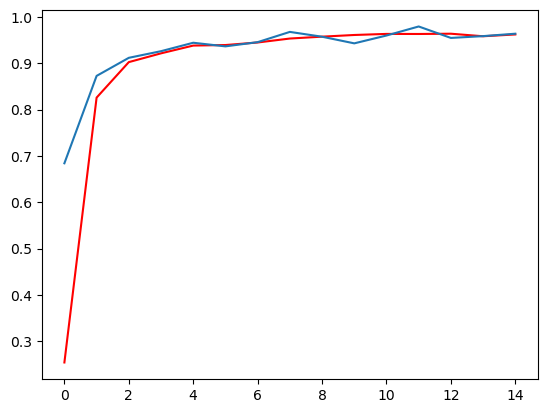

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
fig.show()

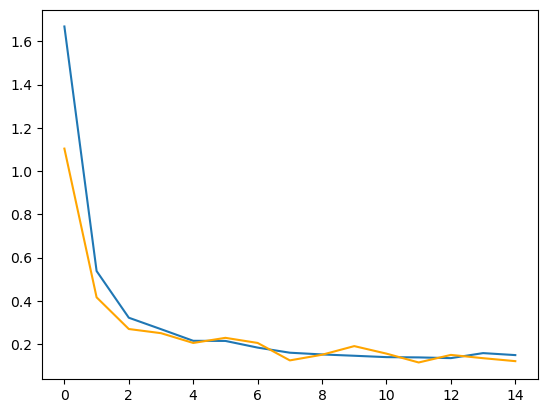

In [12]:
fig
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

In [49]:
predictions_original = model.predict(X_test)
rounded_predictions = np.apply_along_axis(lambda x: np.round(x), 1, predictions_original)

61/61 [==============================] - 1s 9ms/step


In [50]:
y_test_argmax = tf.argmax(y_test, axis=1)


In [51]:
rounded_predictions

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [62]:
prediction_index_probs: dict[int, list] = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

low_prob_indices = []
low_prob_predictions = []

for i, prediction in enumerate(predictions_original):
    prediction_index = np.argmax(prediction)
    prediction_prob = prediction[prediction_index]
    if prediction_prob < 0.7:
        low_prob_indices.append(i)
        low_prob_predictions.append(prediction)
    prediction_index_probs[prediction_index].append(prediction_prob)
    # print(prediction_index_probs)

for key in prediction_index_probs.keys():
    print(f"average {key}", np.argmin(prediction_index_probs[key]))    


average 0 12
average 1 184
average 2 308
average 3 75
average 4 348
average 5 29


In [67]:
print(f"{len(low_prob_indices)} out of {len(X_test)}")
print(f"percentage: {len(low_prob_indices)/len(X_test)}")

116 out of 1922
percentage: 0.060353798126951096


In [60]:
X_test_paths[1907]

'./_data/B/Question172-scan0015.jpg'

In [57]:
predictions_original[11]

array([0.12641414, 0.00768519, 0.00093208, 0.00204984, 0.8593111 ,
       0.00360764], dtype=float32)

In [28]:
predictions = tf.argmax(rounded_predictions, axis=1)

In [45]:
cm = tf.math.confusion_matrix(y_test_argmax, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

In [46]:
cm.numpy()

array([[0.98108108, 0.0027027 , 0.        , 0.00540541, 0.00810811,
        0.0027027 ],
       [0.02849003, 0.95156695, 0.00569801, 0.00569801, 0.00569801,
        0.002849  ],
       [0.0132626 , 0.        , 0.94960212, 0.03183024, 0.00265252,
        0.00265252],
       [0.01358696, 0.        , 0.        , 0.95380435, 0.0326087 ,
        0.        ],
       [0.02122016, 0.        , 0.        , 0.01591512, 0.9602122 ,
        0.00265252],
       [0.08860759, 0.01265823, 0.01265823, 0.07594937, 0.02531646,
        0.78481013]])

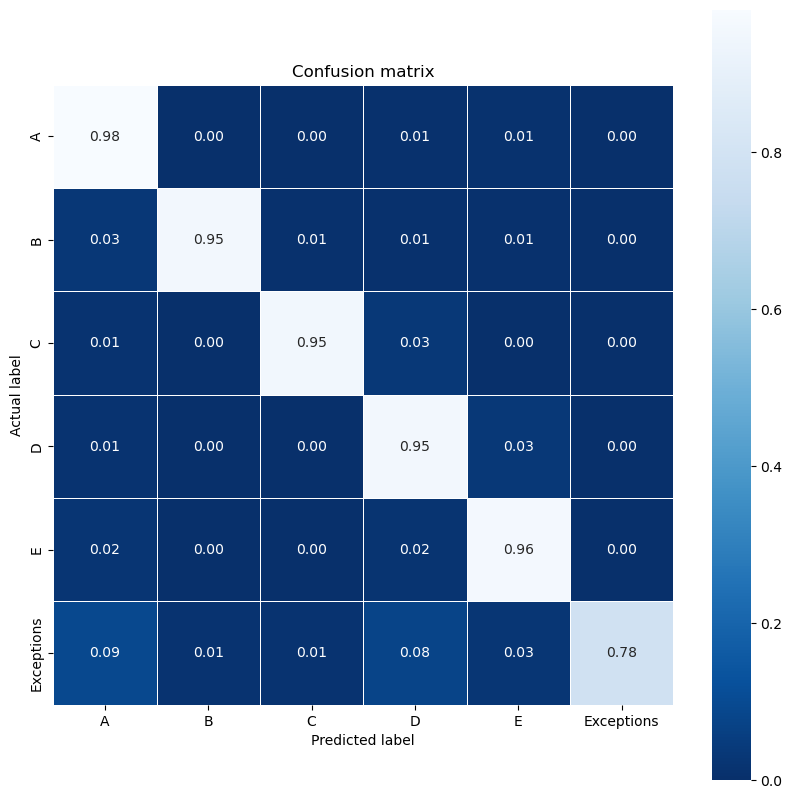

In [47]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square=True, cmap='Blues_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion matrix")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Accuracy, Recall, BinaryAccuracy

labels = y_test

precision = Precision()
accuracy = Accuracy()
recall = Recall()

In [ ]:
# Evaluate the metrics
precision.update_state(labels, rounded_predictions)
accuracy.update_state(labels, rounded_predictions)
recall.update_state(labels, rounded_predictions)

# Print the metrics
print('Precision:', precision.result().numpy())
print('Accuracy:', accuracy.result().numpy())
print('Recall:', recall.result().numpy())

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [25]:
import cv2

# a = cv2.imread(dataset_dir + '/double/Question1-scan0048.jpg')
# getting all the files in a dir
for image_name in os.listdir("./_data/double"):
    image_path = os.path.join("./_data/double", image_name)
    a = cv2.imread(image_path)
    resize = tf.image.resize(a, (130, 20))
    b = model.predict(np.expand_dims(resize/255, 0))
    c = np.apply_along_axis(lambda x: np.max(x), 1, b)
    print(image_name, c)
# plt.imshow(a)
    # e = np.apply_along_axis(lambda x: np.round(x), 1, b)

1/1 [==============================] - 0s 13ms/step
Question51-scan0048.jpg [0.62712437]
1/1 [==============================] - 0s 13ms/step
Question43-scan0048.jpg [0.9623627]
1/1 [==============================] - 0s 13ms/step
Question16-scan0048.jpg [0.99535036]
1/1 [==============================] - 0s 14ms/step
Question11-scan0048.jpg [0.6196985]
1/1 [==============================] - 0s 14ms/step
Question72-scan0048.jpg [0.99681276]
1/1 [==============================] - 0s 13ms/step
Question27-scan0048.jpg [0.86267227]
1/1 [==============================] - 0s 14ms/step
Question75-scan0048.jpg [0.957994]
1/1 [==============================] - 0s 14ms/step
Question20-scan0048.jpg [0.9889059]
1/1 [==============================] - 0s 18ms/step
Question67-scan0048.jpg [0.97574675]
1/1 [==============================] - 0s 13ms/step
Question32-scan0048.jpg [0.49070036]
1/1 [==============================] - 0s 12ms/step
Question10-scan0048.jpg [0.8672704]
1/1 [======================

In [6]:
import cv2
import numpy as np
model = tf.keras.models.load_model('saved_models/model_1.h5')

img = cv2.imread('./output_folder/Question2.jpg')
resize = tf.image.resize(img, [130, 20])
predictions = model.predict(np.expand_dims(resize/255, axis=0))

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2023-06-27 12:34:42.576695: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-06-27 12:34:42.580013: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499950000 Hz
2023-06-27 12:34:42.693417: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-06-27 12:34:42.889521: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


Accuracy: 97.45%


In [7]:
predictions

array([[0.3228849 , 0.01961753, 0.07438634, 0.02790102, 0.09390964,
        0.46130052]], dtype=float32)

In [8]:
pred = np.apply_along_axis(lambda x: np.round(x), 1, predictions)

In [11]:
predictions

array([[0.3228849 , 0.01961753, 0.07438634, 0.02790102, 0.09390964,
        0.46130052]], dtype=float32)

In [9]:
shading= {
    0: 'A',
    1: 'B',
    2: 'C', 
    3: 'D', 
    4: 'E',
    5: 'Exception'
}
for i in range(len(pred)):
    for j in range(len(pred[i])):
        if pred[i][j] == 1:
            print(shading[j], end=' ')